## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
def build_mlp_01(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio = 1e-8, drp_ratio=0.1):
    """Code Here
    建立你的神經網路 (參數大雜燴, 根據前幾範例得到的結論 取所有最優的參數組合實施)
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#將 BatchNormalization 與 Dropout 順序調換看看
def build_mlp_02(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio = 1e-8, drp_ratio=0.1):
    """Code Here
    建立你的神經網路 (參數大雜燴)
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = 0.95

In [8]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp_01(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
______

50000/50000 [==============================] - 12s 240us/step - loss: 1.8722 - acc: 0.3566 - val_loss: 1.8197 - val_acc: 0.3724
Epoch 24/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.8815 - acc: 0.3526 - val_loss: 1.8292 - val_acc: 0.3810
Epoch 25/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.8697 - acc: 0.3557 - val_loss: 1.9062 - val_acc: 0.3459
Epoch 26/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8649 - acc: 0.3607 - val_loss: 1.8733 - val_acc: 0.3485
Epoch 27/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.8937 - acc: 0.3503 - val_loss: 1.8941 - val_acc: 0.3454
Epoch 28/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8785 - acc: 0.3536 - val_loss: 1.7960 - val_acc: 0.3820
Epoch 29/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.8947 - acc: 0.3461 - val_loss: 1.8159 - val_acc: 0.3799
Epoch 30/50
50000/50000 [=======

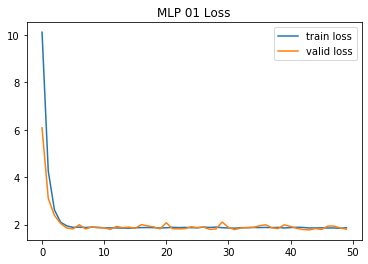

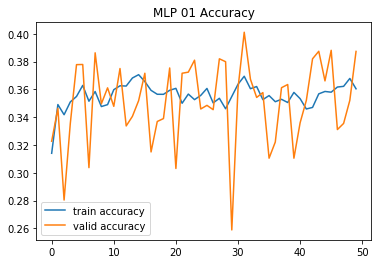

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("MLP 01 Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("MLP 01 Accuracy")
plt.show()

In [10]:
model = build_mlp_02(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0   

50000/50000 [==============================] - 12s 248us/step - loss: 1.8068 - acc: 0.4107 - val_loss: 1.8236 - val_acc: 0.4131
Epoch 47/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.8097 - acc: 0.4098 - val_loss: 2.1160 - val_acc: 0.3326
Epoch 48/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7895 - acc: 0.4140 - val_loss: 2.0263 - val_acc: 0.3261
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7961 - acc: 0.4170 - val_loss: 2.0150 - val_acc: 0.3174
Epoch 50/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8006 - acc: 0.4105 - val_loss: 2.0271 - val_acc: 0.3447


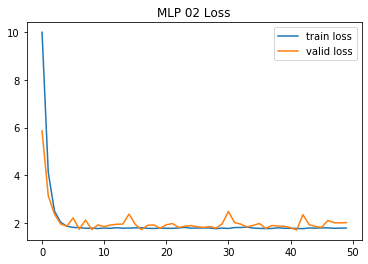

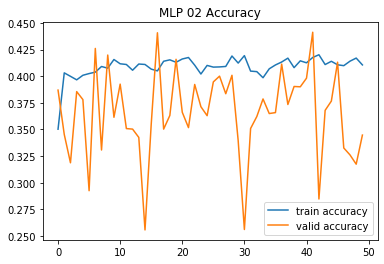

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("MLP 02 Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("MLP 02 Accuracy")
plt.show()

In [ ]:
# 糟糕...valid accuracy 好像不太穩定